In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
import pickle
import pandas as pd 

data_state = pd.read_csv('3_state.csv', encoding='utf8')
#pickle 

# An arbitrary collection of objects supported by pickle.
data_state = pd.read_csv('3_state.csv', encoding='utf8')

with open('data_state.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data_state, f, pickle.HIGHEST_PROTOCOL)

/home/athena/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (28,29,30,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
import pickle

with open('data_state.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)

In [35]:
data.columns

Index(['tract_to_msamd_income', 'rate_spread', 'population',
       'minority_population', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'loan_amount_000s',
       'hud_median_family_income', 'applicant_income_000s', 'state_name',
       'state_abbr', 'sequence_number', 'respondent_id', 'purchaser_type_name',
       'property_type_name', 'preapproval_name', 'owner_occupancy_name',
       'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'edit_status_name', 'denial_reason_name_3',
       'denial_reason_name_2', 'denial_reason_name_1', 'county_name',
       'co_applicant_sex_name', 'co_applicant_race_name_5',
       'co_applicant_race_name_4', 'co_applicant_race_name_3',
       'co_applicant_race_name_2', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'census_tract_number', 'as_of_year',
       'application_date_indicator', 'applicant_sex_name',
       'applicant_race_name_5', 'applicant_rac

In [36]:
data.isnull().sum()

tract_to_msamd_income                7812
rate_spread                       1999241
population                           7812
minority_population                  7812
number_of_owner_occupied_units       7812
number_of_1_to_4_family_units        7812
loan_amount_000s                      945
hud_median_family_income             7812
applicant_income_000s              231203
state_name                              0
state_abbr                              0
sequence_number                   2041873
respondent_id                           0
purchaser_type_name                     0
property_type_name                      0
preapproval_name                        0
owner_occupancy_name                    0
msamd_name                          60975
loan_type_name                          0
loan_purpose_name                       0
lien_status_name                        0
hoepa_status_name                       0
edit_status_name                  2041873
denial_reason_name_3              

In [ ]:
data['state_name'].value_counts()

In [39]:
s = data.isnull().apply(sum, axis=0) # count the number of nan in each column

In [ ]:
print(s)

In [40]:
for col in data: 
    if s[col] >= 100000:  
        del data[col]

In [ ]:
data.columns

In [ ]:
data[['tract_to_msamd_income','loan_amount_000s', 'loan_purpose_name']]

In [42]:
#data['msamd_name']

In [43]:
#loan purpose type and their action 
purpose_data=data.groupby(['loan_purpose_name','action_taken_name','state_name']).agg({'action_taken_name' : "count"})


purpose_data.head(3)

action_taken_name
loan_purpose_name action_taken_name                     state_name                      
Home improvement  Application approved but not accepted California                  3878
                                                        Hawaii                       151
                                                        Massachusetts                584

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score


In [ ]:
#1-1number of people who got loan approved in different gender ineach state
#2-number of people who got loan approved in different gender ineach county 
#3 -different reason for not getting approved in different race ethnithinty in states and county
#4- for people with same slary range how many of them got approved vs not approved by gender, 
   #ethinity , race in county and states 
#5- population of women and approval and rejection in each race and ethinithy by state and county 

In [ ]:
data.columns

In [45]:
#distribution of loan by state
data['count_action_state']=data.groupby(['action_taken_name','state_name'])['state_name'].transform('count')
data_state_name=data.drop_duplicates(subset=['action_taken_name','state_name'])
data_state_name=data_state_name[['action_taken_name','state_name','count_action_state']]


In [46]:
data_state_name_CA=data_state_name[data_state_name['state_name']=='California']
data_state_name_MA=data_state_name[data_state_name['state_name']=='Massachusetts']
data_state_name_Ha=data_state_name[data_state_name['state_name']=='Hawaii']


In [ ]:
data_state_name.head(3)


In [ ]:
data_state_name_Ha.head(2)


In [ ]:
data_state_name_MA.head(2)


In [ ]:
data_state_name_CA.head(2)


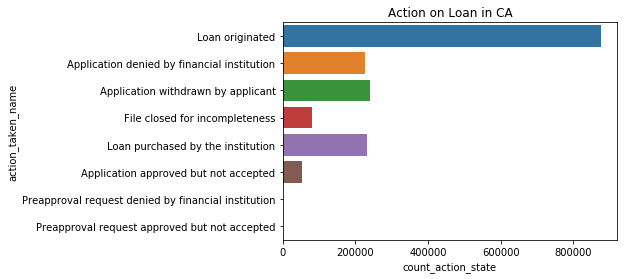

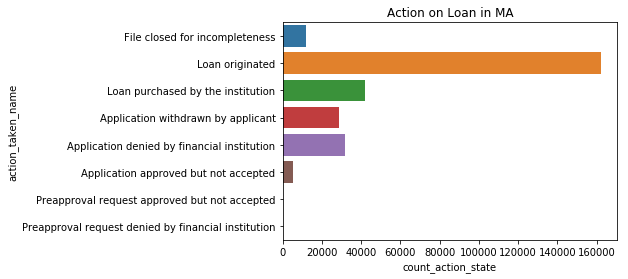

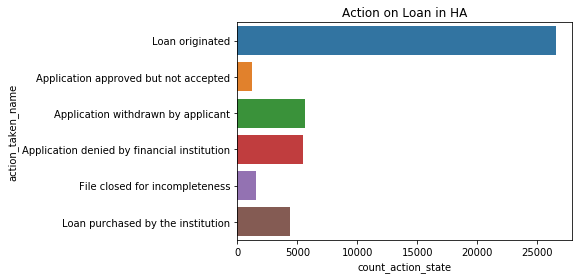

In [47]:
%matplotlib inline
ax_sm =sns.barplot(y='action_taken_name', x='count_action_state', data=data_state_name_CA)
ax_sm.set_title('Action on Loan in CA')
plt.show()

ax_sm =sns.barplot(y='action_taken_name', x='count_action_state', data=data_state_name_MA)
ax_sm.set_title('Action on Loan in MA')
plt.show()

ax_sm =sns.barplot(y='action_taken_name', x='count_action_state', data=data_state_name_Ha)
ax_sm.set_title('Action on Loan in HA')
plt.show()

In [48]:
#Ethnic groups 
#distribution of loan by state
data['count_ethnic']=data.groupby(['action_taken_name','applicant_ethnicity_name','state_name'])['applicant_ethnicity_name'].transform('count')
data_state_ethnic=data.drop_duplicates(subset=['action_taken_name','applicant_ethnicity_name','state_name'])
data_state_ethnic=data_state_ethnic[['action_taken_name','state_name','applicant_ethnicity_name','count_ethnic']]


In [49]:
data_state_ethnic[(data_state_ethnic['state_name']=='California') & (data_state_ethnic['applicant_ethnicity_name']=='Not Hispanic or Latino')]

,action_taken_name,state_name,applicant_ethnicity_name,count_ethnic
1,Application denied by financial institution,California,Not Hispanic or Latino,135120
4,Loan originated,California,Not Hispanic or Latino,577283
5,Application withdrawn by applicant,California,Not Hispanic or Latino,146318
14,Loan purchased by the institution,California,Not Hispanic or Latino,62636
83,File closed for incompleteness,California,Not Hispanic or Latino,47288
147,Application approved but not accepted,California,Not Hispanic or Latino,32705
86127,Preapproval request denied by financial instit...,California,Not Hispanic or Latino,45
126879,Preapproval request approved but not accepted,California,Not Hispanic or Latino,44


In [50]:
data_ethnic_CA=data_state_ethnic[data_state_ethnic['state_name']=='California']
data_ethnic_MA=data_state_ethnic[data_state_ethnic['state_name']=='Massachusetts']
data_ethnic_HA=data_state_ethnic[data_state_ethnic['state_name']=='Hawaii']

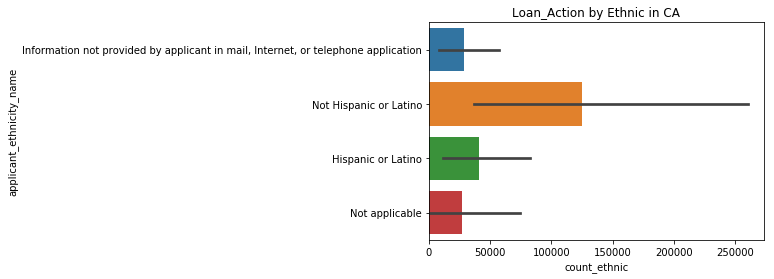

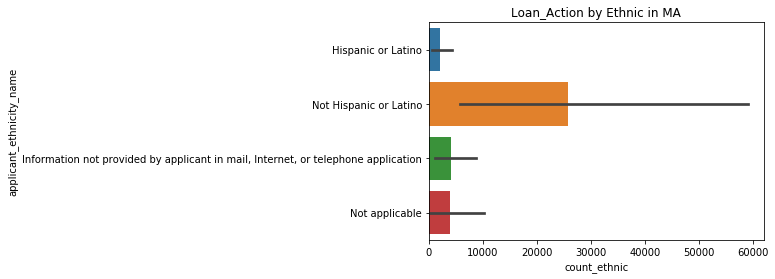

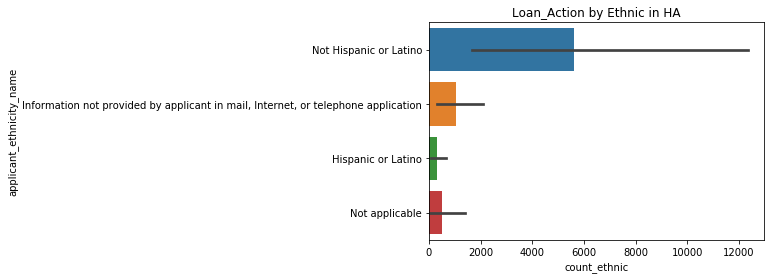

In [51]:
%matplotlib inline
ax_sm =sns.barplot(y='applicant_ethnicity_name', x='count_ethnic', data=data_ethnic_CA)
ax_sm.set_title('Loan_Action by Ethnic in CA')
plt.show()

ax_sm =sns.barplot(y='applicant_ethnicity_name', x='count_ethnic', data=data_ethnic_MA)
ax_sm.set_title('Loan_Action by Ethnic in MA')
plt.show()

ax_sm =sns.barplot(y='applicant_ethnicity_name', x='count_ethnic', data=data_ethnic_HA)
ax_sm.set_title('Loan_Action by Ethnic in HA')
plt.show()

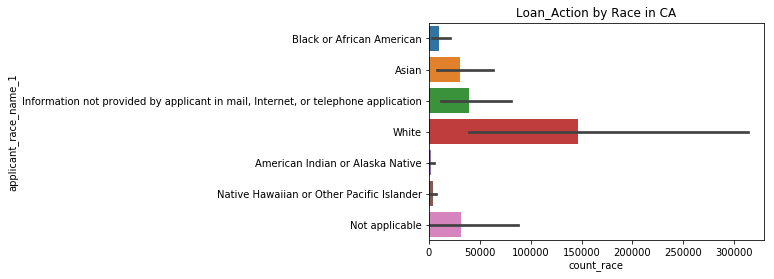

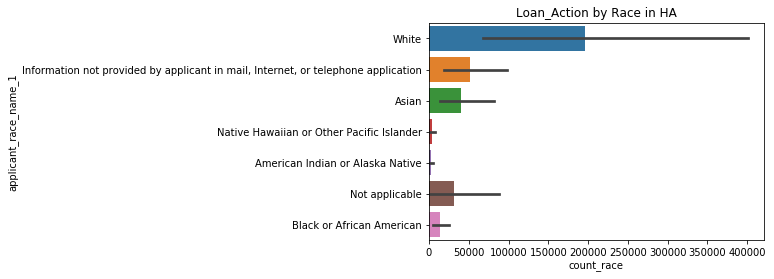

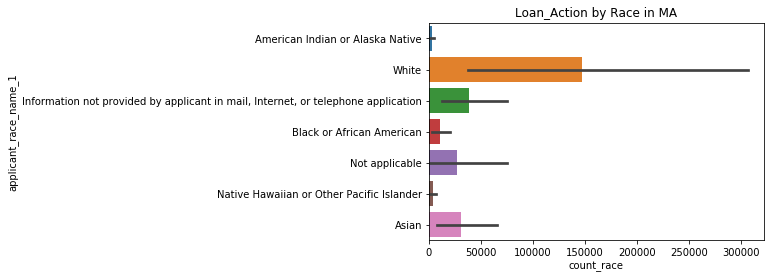

In [52]:
#Loan Status and Race
data['count_race']=data.groupby(['action_taken_name','applicant_race_name_1'])['applicant_race_name_1'].transform('count')
data.head(20)
data_state_race=data.drop_duplicates(subset=['action_taken_name','applicant_race_name_1','state_name'])
data_state_race=data_state_race[['state_name','action_taken_name','applicant_race_name_1','count_race']]

data_race_CA=data_state_race[data_state_race['state_name']=='California']
data_race_MA=data_state_race[data_state_race['state_name']=='Massachusetts']
data_race_HA=data_state_race[data_state_race['state_name']=='Hawaii']


ax_sm =sns.barplot(y='applicant_race_name_1', x='count_race', data=data_race_CA)
# # #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax_sm.set_title('Loan_Action by Race in CA')
plt.figure()


ax_sm =sns.barplot(y='applicant_race_name_1', x='count_race', data=data_race_HA)
# # #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax_sm.set_title('Loan_Action by Race in HA')
plt.figure()

ax_sm =sns.barplot(y='applicant_race_name_1', x='count_race', data=data_race_MA)
# # #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax_sm.set_title('Loan_Action by Race in MA')
plt.figure()


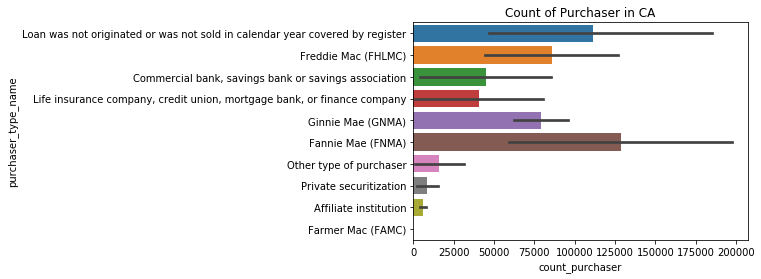

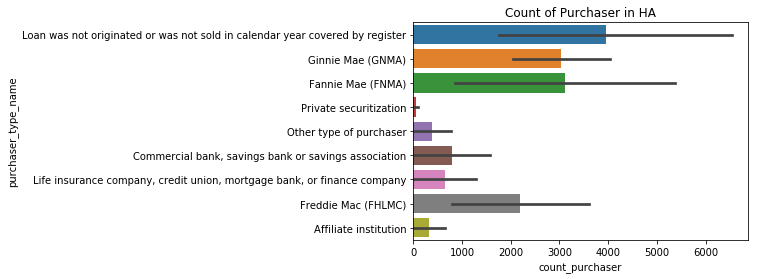

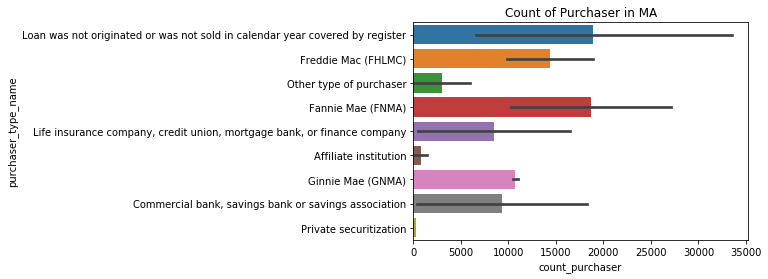

In [53]:
#purchaser
data['count_purchaser']=data.groupby(['action_taken_name','purchaser_type_name','state_name'])['purchaser_type_name'].transform('count')

data_purchase=data.drop_duplicates(subset=['action_taken_name','purchaser_type_name','state_name'])
data_purchase=data_purchase[['state_name','action_taken_name','purchaser_type_name','count_purchaser']]


data_purchase_CA=data_purchase[data_purchase['state_name']=='California']
data_purchase_MA=data_purchase[data_purchase['state_name']=='Massachusetts']
data_purchase_HA=data_purchase[data_purchase['state_name']=='Hawaii']


ax_sm =sns.barplot(y='purchaser_type_name', x='count_purchaser', data=data_purchase_CA)
ax_sm.set_title('Count of Purchaser in CA')
plt.figure()


ax_sm =sns.barplot(y='purchaser_type_name', x='count_purchaser', data=data_purchase_HA)
ax_sm.set_title('Count of Purchaser in HA')
plt.figure()

ax_sm =sns.barplot(y='purchaser_type_name', x='count_purchaser', data=data_purchase_MA)
ax_sm.set_title('Count of Purchaser in MA')
plt.figure()



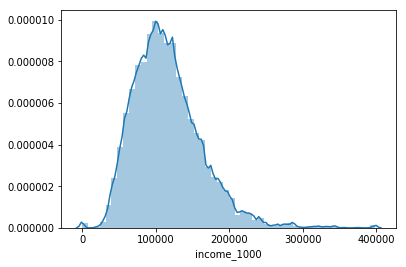

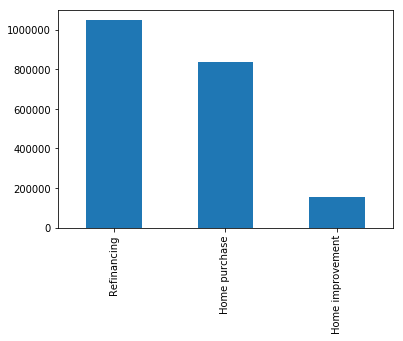

In [54]:
#Applicant Income Distribution
#actionStatus = "Loan originated"
from ggplot import *
data['income_1000']=data['tract_to_msamd_income']*1000
data['loan_amount']=data['loan_amount_000s']*1000
sns.distplot(data.income_1000.dropna(), hist=True)
plt.show()

#loan purpose type   and loan purpose type and their action 
d1=data['loan_purpose_name'].value_counts()

%matplotlib inline
d1.plot.bar(x='count' ,y='loan_purpose_name')
#plot.show()

In [55]:
print(data[data.action_taken_name == 'Loan originated'].population.sum()/data[data.action_taken_name == 'Loan originated'].population.count())


5767.86592542


In [56]:
#data['agency_name'].value_counts()
print(data['agency_name'].where(data['state_name']=='California').value_counts())
print()
print(data['agency_name'].where(data['state_name']=='Massachusetts').value_counts())
print()
print(data['agency_name'].where(data['state_name']=='Hawaii').value_counts())



Department of Housing and Urban Development    1005353
Consumer Financial Protection Bureau            545436
National Credit Union Administration             74203
Federal Deposit Insurance Corporation            47492
Office of the Comptroller of the Currency        30729
Federal Reserve System                           11246
Name: agency_name, dtype: int64

Department of Housing and Urban Development    113473
Consumer Financial Protection Bureau            65045
Federal Deposit Insurance Corporation           54329
National Credit Union Administration            28712
Federal Reserve System                          10924
Office of the Comptroller of the Currency       10063
Name: agency_name, dtype: int64

Department of Housing and Urban Development    22212
Consumer Financial Protection Bureau           12648
Federal Deposit Insurance Corporation           3777
National Credit Union Administration            3099
Office of the Comptroller of the Currency       1901
Federal Reserve

In [57]:

print(data['purchaser_type_name'].where(data['state_name']=='California').value_counts())
print()
print(data['purchaser_type_name'].where(data['state_name']=='Massachusetts').value_counts())
print()
print(data['purchaser_type_name'].where(data['state_name']=='Hawaii').value_counts())

Loan was not originated or was not sold in calendar year covered by register    893403
Fannie Mae (FNMA)                                                               257246
Freddie Mac (FHLMC)                                                             171975
Ginnie Mae (GNMA)                                                               158456
Commercial bank, savings bank or savings association                             89764
Life insurance company, credit union, mortgage bank, or finance company          82080
Other type of purchaser                                                          31979
Private securitization                                                           17202
Affiliate institution                                                            12319
Farmer Mac (FAMC)                                                                   35
Name: purchaser_type_name, dtype: int64

Loan was not originated or was not sold in calendar year covered by register    151017
Fa

In [28]:
data.columns

Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income', 'state_name',
       'state_abbr', 'respondent_id', 'purchaser_type_name',
       'property_type_name', 'preapproval_name', 'owner_occupancy_name',
       'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'county_name', 'co_applicant_sex_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'census_tract_number', 'as_of_year', 'applicant_sex_name',
       'applicant_race_name_1', 'applicant_ethnicity_name', 'agency_name',
       'agency_abbr', 'action_taken_name', 'count_action_state',
       'count_ethnic', 'count_race', 'count_purchaser', 'income_1000',
       'loan_amount'],
      dtype='object')

In [66]:
#1 create 3 data for 3 states  
#2 create dummies for each 
#3  yest and train  set 
#4 create function to do all the modeling and create output based on states


got_loan_features=data[['action_taken_name','income_1000','loan_amount','hud_median_family_income',
                            'number_of_1_to_4_family_units','number_of_owner_occupied_units',
                            'applicant_sex_name','co_applicant_sex_name','property_type_name', 'preapproval_name',
    'msamd_name', 'loan_type_name','loan_purpose_name',
    'lien_status_name','hoepa_status_name', 'county_name','state_name',
        'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
        'applicant_race_name_1', 'applicant_ethnicity_name','purchaser_type_name']]

In [ ]:
got_loan_features.head(4)

In [67]:
got_loan_features.isnull().sum()

action_taken_name                     0
income_1000                        7812
loan_amount                         945
hud_median_family_income           7812
number_of_1_to_4_family_units      7812
number_of_owner_occupied_units     7812
applicant_sex_name                    0
co_applicant_sex_name                 0
property_type_name                    0
preapproval_name                      0
msamd_name                        60975
loan_type_name                        0
loan_purpose_name                     0
lien_status_name                      0
hoepa_status_name                     0
county_name                        2272
state_name                            0
co_applicant_race_name_1              0
co_applicant_ethnicity_name           0
applicant_race_name_1                 0
applicant_ethnicity_name              0
purchaser_type_name                   0
dtype: int64

In [ ]:
got_loan_features.shape  #(52015, 20)  we had county_name  with 31 , msamd_name with 44, 
                         # number_of_owner_occupied_units  35, number_of_1_to_4_family_units 35, 
                        #hud_median_family_income 35, income_1000 35 records are null, so we can remove them.
        

In [68]:

#all records with missing values are dropped from rows
got_loan_features=got_loan_features.dropna()

In [69]:

got_loan_features.columns

Index(['action_taken_name', 'income_1000', 'loan_amount',
       'hud_median_family_income', 'number_of_1_to_4_family_units',
       'number_of_owner_occupied_units', 'applicant_sex_name',
       'co_applicant_sex_name', 'property_type_name', 'preapproval_name',
       'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'county_name', 'state_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_ethnicity_name',
       'purchaser_type_name'],
      dtype='object')

In [70]:
#create target variable Loan Action=1 if loan originated ; Otherwise Loan Action=0(churn)
got_loan_features['Loan Action']= got_loan_features['action_taken_name']== 'Loan originated'


In [ ]:
got_loan_features['Loan Action'].value_counts()

In [ ]:
got_loan_features.columns

In [71]:
got_loan_features = got_loan_features.drop(['action_taken_name'],axis=1)

In [79]:
# CA featurs 
got_loan_features_CA=got_loan_features[got_loan_features['state_name']=='California']

X_CA=pd.get_dummies(got_loan_features_CA[['income_1000', 'loan_amount','hud_median_family_income',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'applicant_sex_name', 'co_applicant_sex_name', 'property_type_name',
       'preapproval_name', 'msamd_name', 'loan_type_name', 'loan_purpose_name',
       'lien_status_name', 'hoepa_status_name', 'county_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_ethnicity_name','purchaser_type_name']], drop_first=True)

Y_CA=pd.get_dummies(got_loan_features_CA['Loan Action'], drop_first=True)


In [78]:
#MA features 
got_loan_features_MA=got_loan_features[got_loan_features['state_name']=='Massachusetts']

X_MA=pd.get_dummies(got_loan_features_MA[['income_1000', 'loan_amount','hud_median_family_income',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'applicant_sex_name', 'co_applicant_sex_name', 'property_type_name',
       'preapproval_name', 'msamd_name', 'loan_type_name', 'loan_purpose_name',
       'lien_status_name', 'hoepa_status_name', 'county_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_ethnicity_name','purchaser_type_name']], drop_first=True)

Y_MA=pd.get_dummies(got_loan_features_MA['Loan Action'], drop_first=True)


In [80]:
#Hawaii
got_loan_features_HA=got_loan_features[got_loan_features['state_name']=='Hawaii']



X_HA=pd.get_dummies(got_loan_features_HA[['income_1000', 'loan_amount','hud_median_family_income',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'applicant_sex_name', 'co_applicant_sex_name', 'property_type_name',
       'preapproval_name', 'msamd_name', 'loan_type_name', 'loan_purpose_name',
       'lien_status_name', 'hoepa_status_name', 'county_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_ethnicity_name','purchaser_type_name']], drop_first=True)

Y_HA=pd.get_dummies(got_loan_features_HA['Loan Action'], drop_first=True)


In [83]:
X_CA.shape, X_MA.shape, X_HA.shape

((1666765, 118), (277282, 69), (35965, 55))

In [84]:
Y_CA.shape  , Y_MA.shape,Y_HA.shape

((1666765, 1), (277282, 1), (35965, 1))

In [ ]:
#X

In [ ]:
X.columns

In [88]:
#sns.lmplot(x='income_1000', y='loan_amount', hue='Loan Action', data=got_loan_features, fit_reg=False, scatter_kws={'alpha':0.5})
# sns.barplot(Y_CA="income_1000", X_CA='Loan Action', data=got_loan_features_CA, palette='GnBu_d')
# plt.show()
# sns.barplot(Y_CA="number_of_1_to_4_family_units", X_CA='Loan Action', data=got_loan_features_CA, palette='GnBu_d')
# plt.show()



In [100]:
# from sklearn import preprocessing   Not a big difference in result 
# normalized_X = preprocessing.normalize(X)
#  I will normalize data for 5 column 
X_CA['income_1000_1']=abs((X_CA['income_1000'] - X_CA['income_1000'].mean()) / (X_CA['income_1000'].max() - X_CA['income_1000'].min()))

X_CA['loan_amount_1']=abs((X_CA['loan_amount'] - X_CA['loan_amount'].mean()) / (X_CA['loan_amount'].max() - X_CA['loan_amount'].min()))
X_CA['hud_median_family_income_1']=abs((X_CA['hud_median_family_income'] - X_CA['hud_median_family_income'].mean()) / (X_CA['hud_median_family_income'].max() - X_CA['hud_median_family_income'].min()))
X_CA['number_of_owner_occupied_units_1']=abs((X_CA['number_of_owner_occupied_units'] - X_CA['number_of_owner_occupied_units'].mean()) / (X_CA['number_of_owner_occupied_units'].max() - X_CA['number_of_owner_occupied_units'].min()))
X_CA['number_of_1_to_4_family_units_1']=abs((X_CA['number_of_1_to_4_family_units'] - X_CA['number_of_1_to_4_family_units'].mean()) / (X_CA['number_of_1_to_4_family_units'].max() - X_CA['number_of_1_to_4_family_units'].min()))

#after normalizing we drop original non normal columns from X
#.drop([''],axis=1)
X_CA.drop(['income_1000','loan_amount','hud_median_family_income','number_of_1_to_4_family_units','number_of_owner_occupied_units'],axis=1)


,"applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",applicant_sex_name_Male,applicant_sex_name_Not applicable,"co_applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",co_applicant_sex_name_Male,co_applicant_sex_name_No co-applicant,co_applicant_sex_name_Not applicable,property_type_name_Multifamily dwelling,property_type_name_One-to-four family dwelling (other than manufactured housing),preapproval_name_Preapproval was not requested,...,purchaser_type_name_Ginnie Mae (GNMA),"purchaser_type_name_Life insurance company, credit union, mortgage bank, or finance company",purchaser_type_name_Loan was not originated or was not sold in calendar year covered by register,purchaser_type_name_Other type of purchaser,purchaser_type_name_Private securitization,income_1000_1,loan_amount_1,hud_median_family_income_1,number_of_owner_occupied_units_1,number_of_1_to_4_family_units_1
0,0,0,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0.120281,2.112828e-04,0.264475,0.058345,0.056229
1,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.003903,5.039150e-04,0.141700,0.001322,0.001638
2,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0.060632,1.378194e-03,0.264475,0.117821,0.084824
4,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.186722,4.449675e-04,0.264475,0.114761,0.045794
5,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0.025473,4.639149e-04,0.298470,0.129678,0.109218
6,1,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0.120281,7.560164e-07,0.264475,0.058345,0.056229
7,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0.106536,2.091775e-04,0.141700,0.138284,0.138625
8,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.069892,5.733888e-04,0.141700,0.041134,0.056636
9,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0.050906,1.549289e-05,0.264475,0.048750,0.058691
10,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0.022884,1.902301e-04,0.000817,0.096178,0.050289


In [101]:
X_MA['income_1000_1']=abs((X_MA['income_1000'] - X_MA['income_1000'].mean()) / (X_MA['income_1000'].max() - X_MA['income_1000'].min()))

X_MA['loan_amount_1']=abs((X_MA['loan_amount'] - X_MA['loan_amount'].mean()) / (X_MA['loan_amount'].max() - X_MA['loan_amount'].min()))
X_MA['hud_median_family_income_1']=abs((X_MA['hud_median_family_income'] - X_MA['hud_median_family_income'].mean()) / (X_MA['hud_median_family_income'].max() - X_MA['hud_median_family_income'].min()))
X_MA['number_of_owner_occupied_units_1']=abs((X_MA['number_of_owner_occupied_units'] - X_MA['number_of_owner_occupied_units'].mean()) / (X_MA['number_of_owner_occupied_units'].max() - X_MA['number_of_owner_occupied_units'].min()))
X_MA['number_of_1_to_4_family_units_1']=abs((X_MA['number_of_1_to_4_family_units'] - X_MA['number_of_1_to_4_family_units'].mean()) / (X_MA['number_of_1_to_4_family_units'].max() - X_MA['number_of_1_to_4_family_units'].min()))

#after normalizing we drop original non normal columns from X
#.drop([''],axis=1)
X_MA.drop(['income_1000','loan_amount','hud_median_family_income','number_of_1_to_4_family_units','number_of_owner_occupied_units'],axis=1)


,"applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",applicant_sex_name_Male,applicant_sex_name_Not applicable,"co_applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",co_applicant_sex_name_Male,co_applicant_sex_name_No co-applicant,co_applicant_sex_name_Not applicable,property_type_name_Multifamily dwelling,property_type_name_One-to-four family dwelling (other than manufactured housing),preapproval_name_Preapproval was not requested,...,purchaser_type_name_Ginnie Mae (GNMA),"purchaser_type_name_Life insurance company, credit union, mortgage bank, or finance company",purchaser_type_name_Loan was not originated or was not sold in calendar year covered by register,purchaser_type_name_Other type of purchaser,purchaser_type_name_Private securitization,income_1000_1,loan_amount_1,hud_median_family_income_1,number_of_owner_occupied_units_1,number_of_1_to_4_family_units_1
3,0,1,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0.011866,2.618023e-05,0.330687,0.102626,0.086079
13,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0.091897,1.489041e-04,0.330687,0.015907,0.023705
19,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0.351593,5.334161e-04,0.055817,0.119026,0.143896
26,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.049234,7.466511e-05,0.213816,0.062879,0.030661
32,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.049234,7.331831e-05,0.213816,0.062879,0.030661
37,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.037044,1.945305e-04,0.055817,0.011870,0.033957
39,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0.091135,2.079302e-05,0.213816,0.304827,0.187493
43,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.140295,8.678633e-05,0.055817,0.145928,0.043898
50,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0.235568,2.027762e-04,0.213816,0.115837,0.008897
71,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.019408,9.510032e-06,0.055817,0.133451,0.056687


In [102]:
X_HA['income_1000_1']=abs((X_HA['income_1000'] - X_HA['income_1000'].mean()) / (X_HA['income_1000'].max() - X_HA['income_1000'].min()))

X_HA['loan_amount_1']=abs((X_HA['loan_amount'] - X_HA['loan_amount'].mean()) / (X_HA['loan_amount'].max() - X_HA['loan_amount'].min()))
X_HA['hud_median_family_income_1']=abs((X_HA['hud_median_family_income'] - X_HA['hud_median_family_income'].mean()) / (X_HA['hud_median_family_income'].max() - X_HA['hud_median_family_income'].min()))
X_HA['number_of_owner_occupied_units_1']=abs((X_HA['number_of_owner_occupied_units'] - X_HA['number_of_owner_occupied_units'].mean()) / (X_HA['number_of_owner_occupied_units'].max() - X_HA['number_of_owner_occupied_units'].min()))
X_HA['number_of_1_to_4_family_units_1']=abs((X_HA['number_of_1_to_4_family_units'] - X_HA['number_of_1_to_4_family_units'].mean()) / (X_HA['number_of_1_to_4_family_units'].max() - X_HA['number_of_1_to_4_family_units'].min()))

#after normalizing we drop original non normal columns from X
#.drop([''],axis=1)
X_HA.drop(['income_1000','loan_amount','hud_median_family_income','number_of_1_to_4_family_units','number_of_owner_occupied_units'],axis=1)


,"applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",applicant_sex_name_Male,applicant_sex_name_Not applicable,"co_applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",co_applicant_sex_name_Male,co_applicant_sex_name_No co-applicant,co_applicant_sex_name_Not applicable,property_type_name_Multifamily dwelling,property_type_name_One-to-four family dwelling (other than manufactured housing),preapproval_name_Preapproval was not requested,...,purchaser_type_name_Ginnie Mae (GNMA),"purchaser_type_name_Life insurance company, credit union, mortgage bank, or finance company",purchaser_type_name_Loan was not originated or was not sold in calendar year covered by register,purchaser_type_name_Other type of purchaser,purchaser_type_name_Private securitization,income_1000_1,loan_amount_1,hud_median_family_income_1,number_of_owner_occupied_units_1,number_of_1_to_4_family_units_1
67,0,1,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0.103293,0.001394,0.16074,0.136638,0.196500
91,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0.075449,0.000288,0.83926,0.190082,0.163446
157,0,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0.063997,0.001341,0.83926,0.035752,0.045425
207,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0.072373,0.000987,0.83926,0.217685,0.344349
217,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.113166,0.001520,0.16074,0.234405,0.033339
253,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0.035194,0.000514,0.16074,0.176739,0.000263
265,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0.103293,0.000455,0.16074,0.136638,0.196500
303,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.169908,0.003503,0.16074,0.108778,0.361016
315,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0.152084,0.001941,0.16074,0.072898,0.074188
319,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.124636,0.000348,0.16074,0.036853,0.038984


In [99]:
X_CA[['income_1000_1','loan_amount_1','hud_median_family_income_1','number_of_1_to_4_family_units_1','number_of_owner_occupied_units_1']]

,income_1000_1,loan_amount_1,hud_median_family_income_1,number_of_1_to_4_family_units_1,number_of_owner_occupied_units_1
0,0.120281,2.112828e-04,0.264475,0.056229,0.058345
1,0.003903,5.039150e-04,0.141700,0.001638,0.001322
2,0.060632,1.378194e-03,0.264475,0.084824,0.117821
4,0.186722,4.449675e-04,0.264475,0.045794,0.114761
5,0.025473,4.639149e-04,0.298470,0.109218,0.129678
6,0.120281,7.560164e-07,0.264475,0.056229,0.058345
7,0.106536,2.091775e-04,0.141700,0.138625,0.138284
8,0.069892,5.733888e-04,0.141700,0.056636,0.041134
9,0.050906,1.549289e-05,0.264475,0.058691,0.048750
10,0.022884,1.902301e-04,0.000817,0.050289,0.096178


In [108]:
#Splitting the dataset into the Training set and Test set
# from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import train_test_split
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X_CA, Y_CA, test_size = 0.30, random_state = 42)
model = XGBClassifier()
model.fit(X_train, y_train)

# print("Xgboosting train set score {}".format(model.score(X_train,y_train)))
# print("Xgboosting test set score  {}".format(model.score(X_test,y_test)))


/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MemoryError: 

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


In [ ]:
#RandomForestClassifier   #test score0.6542991009244017   #train score 0.6591276032833593

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
#print(clf.feature_importances_)
print('test score{}'.format(clf.score(X_test,y_test)))
print('train score {}'.format(clf.score(X_train,y_train)))

 
#test score0.6542991009244017
#train score 0.6591276032833593


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
stfkfold=StratifiedKFold(n_splits=5 ,random_state=None, shuffle=False)
print('cross validation  stratifiedkfold train score:\n{}'.format(cross_val_score(clf , X_train, y_train,cv=stfkfold)))
print('cross validation  stratifiedkfold test score:\n{}'.format(cross_val_score(clf , X_test, y_test,cv=stfkfold)))


In [ ]:
# #logistic regression Not A Good Choice
# # #Fitting Logistic Regression to the Training set
# from sklearn.linear_model import LogisticRegression
# classifierlog = LogisticRegression(random_state = 42)
# classifierlog.fit(X_train, y_train)

# logistictrainscore=classifierlog.score(X_train,y_train)
# logistictestscore=classifierlog.score(X_test,y_test)
# print('logistic train score {}'.format(logistictrainscore))
# print('logistic test score {}'.format(logistictestscore))


# # logistic train score 0.5714130655993488
# # logistic test score 0.5719260478662783

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=1500, max_samples=33,
                        random_state=1)

bag.fit(X_train, y_train)


In [ ]:
print('test score{}'.format(bag.score(X_test,y_test)))
print('train score {}'.format(bag.score(X_train,y_train)))


In [ ]:
#gradiantboost
from sklearn.ensemble import GradientBoostingClassifier
gradboost=GradientBoostingClassifier(random_state=42, learning_rate=.01 , max_depth=3)
gradboost.fit(X_train,y_train)
print("gradiant boosting train set score {}".format(gradboost.score(X_train,y_train)))
print("gradiant boosting test set score {}".format(gradboost.score(X_test,y_test)))


# #pre-prunning to reduce overfitting by max_depth
# gradboost_pre_prun1=GradientBoostingClassifier(random_state=42 , max_depth=3)
# gradboost_pre_prun1.fit(X_train,y_train)
# print(gradboost_pre_prun1.score(X_train,y_train))
# print(gradboost_pre_prun1.score(X_test,y_test))



In [ ]:
# test a random sample 

ypred = gradboost.predict(X_test)

# We can take a look at the classification report for this classifier:

from sklearn import metrics
print(metrics.classification_report(ypred, y_test))
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypred)
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
# plt.xlabel('true label')
# plt.ylabel('predicted label');


In [ ]:
mat

In [ ]:
ypred_forest =clf.predict(X_test)
mat_forest = confusion_matrix(y_test, ypred_forest)


In [ ]:
mat_forest

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
print("Xgboosting train set score {}".format(model.score(X_train,y_train)))
print("Xgboosting test set score {}".format(model.score(X_test,y_test)))


In [ ]:
ypred_xg =model.predict(X_test)
mat_xg = confusion_matrix(y_test, ypred_xg)



In [ ]:
mat_xg

In [ ]:
predictions = [round(value) for value in ypred_xg]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
import numpy as np
def plot_feature_importances_churn(anymodel):
    print(anymodel.feature_importances_.shape)
    print(X.columns.shape)
    n_features = X.shape[1]
    plt.barh(range(n_features), anymodel.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
#dataset_train.shape
plot_feature_importances_churn(model)
